# Support Vector Machine Classification
Source:
1. https://hands-on.cloud/implementation-of-support-vector-machine-svm-using-python/
2. https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/dataset/global_bleaching_environmental_comma.csv'
df = pd.read_csv(url)
df.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,-9999,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5.0,0.0,0.00,0.74,7.25,0.18,15/09/2005,-9999,-9999,-9999
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,-9999,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4.0,0.0,0.26,0.67,4.65,0.19,15/03/1991,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,-9999
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,-9999,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7.0,0.0,0.00,1.04,11.66,0.26,15/01/2006,-9999,-9999,-9999
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,-9999,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4.0,0.0,0.00,0.75,5.64,0.20,15/04/2006,-9999,-9999,-9999
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,-9999,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5.0,0.0,0.00,0.92,6.89,0.25,15/04/2006,-9999,-9999,-9999


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

In [4]:
df=df.replace(to_replace=-9999,value=0)
df=df.replace(to_replace="-9999",value="0")
df=df.replace(to_replace="Population",value="1")

In [5]:
print(df["Bleaching_Level"].unique())

['0' '1']


SVM Single-class Classification

In [6]:
# importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyoff

In [7]:
# counting the total output data from purchased column
target_balance = df['Bleaching_Level'].value_counts().reset_index()

# dividing the output classes into two sections
target_class = go.Bar(
    name = 'Target Balance',
    x = ['Not bleached', 'Bleached'],
    y = target_balance['Bleaching_Level']
)

# ploting the output classes
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [8]:
# training and testing data
from sklearn.model_selection import train_test_split

# split the data into inputs and outputs
X = df[['Temperature_Mean', 'Windspeed']]
y = df['Bleaching_Level'] # target class

# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
# importing StandardScaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [10]:
from sklearn import svm

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [11]:
# import numpy as np

# #stepsize in the mesh, it alters the accuracy of the plotprint
# #to better understand it, just play with the value, change it and print it
# h = .01
# #create the mesh
# x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
# y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# # create the title that will be shown on the plot
# titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

# for i, clf in enumerate((linear, rbf, poly, sig)):
#     #defines how many plots: 2 rows, 2columns=> leading to 4 plots
#     plt.subplot(2, 2, i + 1) #i+1 is the index
#     #space between plots
#     plt.subplots_adjust(wspace=0.4, hspace=0.4) 
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
#     plt.xlabel('Sepal length')
#     plt.ylabel('Sepal width')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.xticks(())
#     plt.yticks(())
#     plt.title(titles[i])
#     plt.show()

In [13]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.5410501885697708
Accuracy Polynomial Kernel: 0.5411468910163427
Accuracy Radial Basis Kernel: 0.6045836959675079
Accuracy Sigmoid Kernel: 0.4608838603616672


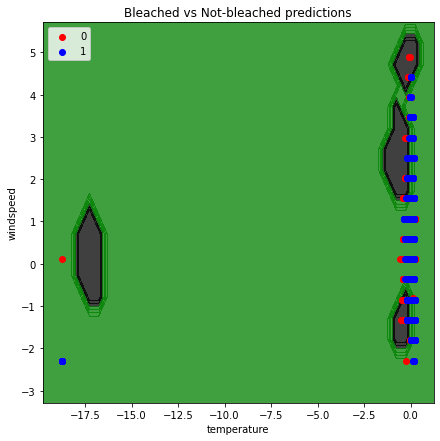

In [16]:
import numpy as np
from matplotlib.colors import ListedColormap

# ploting graph of size 7,7
plt.figure(figsize = (7,7))

# assigning the testing dataset
X_set, y_set = X_test, y_test

# ploting the predicted graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plorting scattred graph for the testing values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'blue'))(i), label = j)

# labelling the graphe
plt.title('Bleached vs Not-bleached predictions')
plt.xlabel('temperature')
plt.ylabel('windspeed')
plt.legend()
plt.show()